<a href="https://colab.research.google.com/github/Benjamindavid03/MachineLearningLab/blob/main/Classification_using_Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Classification using Neural Network.ipynb

## Step 1: Import all the Scikit learn and Keras Modules

In [48]:
# modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
# for modeling
from keras.models import Sequential
from keras.layers import Dense, Dropout
from keras.callbacks import EarlyStopping

## Step 2 : Import the Titanic Data

In [49]:
# read data
df = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


# Step 3 : Preprocess the Training and Validation Datasets : 
1. Remove Attribute containing so many N/A or NULL values
2. Compute Missing values and replace the values
3. Trim and Drop unnecessary columns 

### Before Preprocessing

In [50]:
# View the dataset info
df.info()
#view the dataset
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Preprocessing

In [51]:
# first, delete the cabin column
df.drop(['Cabin'], axis=1, inplace=True)
# now impute the 'Age' column
df['Age'].fillna(df['Age'].mean(), inplace=True)
# now ditch the two rows from 'Embarked'
df.dropna(inplace=True)
# drop unncessary columns from train and testdf
df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
# recode the sex column
df['Sex'].replace(('male', 'female'), (0, 1), inplace=True)
# recode the embarked column
df['Embarked'].replace(('Q', 'S', 'C'), (0, 1, 2), inplace=True)
# View the Class distributions
df['Survived'].value_counts()
# split into X and Y
Y = df['Survived']
X = df.drop(['Survived'], axis=1)
print(X.shape)
print(Y.shape)
# convert to numpy arrays
X = np.array(X)

(889, 7)
(889,)


### After Preprocessing

In [52]:
# View the dataset info
df.info()
#view the dataset
df

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   SibSp     889 non-null    int64  
 5   Parch     889 non-null    int64  
 6   Fare      889 non-null    float64
 7   Embarked  889 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 62.5 KB


,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,0,22.000000,1,0,7.2500,1
1,1,1,1,38.000000,1,0,71.2833,2
2,1,3,1,26.000000,0,0,7.9250,1
3,1,1,1,35.000000,1,0,53.1000,1
4,0,3,0,35.000000,0,0,8.0500,1
...,...,...,...,...,...,...,...,...
886,0,2,0,27.000000,0,0,13.0000,1
887,1,1,1,19.000000,0,0,30.0000,1
888,0,3,1,29.699118,1,2,23.4500,1
889,1,1,0,26.000000,0,0,30.0000,2


# Step 4 : Build an Artificial Neural Network Model and train the Network
1. Create a 3 Layer ANN with 2 ReLu and 1 Sigmoid Activiation functions
2. Compile the model by minimizing the loss function

In [70]:
# build a model
model = Sequential()
model.add(Dense(16, input_shape=(X.shape[1],), activation='relu')) # Add an input shape! (features,)
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))
model.summary() 
# compile the model
model.compile(optimizer='Adam',  # SGD | RMSprop | Adam | Adadelta | Adagrad | Adamax | Nadam | Ftrl
              loss='binary_crossentropy', # sparse_categorical_crossentropy | binary_crossentropy
              metrics=['accuracy'])
# early stopping callback
# This callback will stop the training when there is no improvement in  
# the validation loss for 10 consecutive epochs.  
es = EarlyStopping(monitor='val_accuracy', 
                                   mode='max', # don't minimize the accuracy!
                                   patience=10,
                                   restore_best_weights=True)
# now we just update our model fit call
history = model.fit(X,
                    Y,
                    callbacks=[es],
                    epochs=80, # you can set this to a big number!
                    batch_size=10,
                    validation_split=0.2,
                    shuffle=True,
                    verbose=1)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_21 (Dense)            (None, 16)                128       
                                                                 
 dense_22 (Dense)            (None, 16)                272       
                                                                 
 dense_23 (Dense)            (None, 1)                 17        
                                                                 
Total params: 417
Trainable params: 417
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
72/72 [==============================] - 1s 5ms/step - loss: 0.7724 - accuracy: 0.6076 - val_loss: 0.5812 - val_accuracy: 0.7247
Epoch 2/80
72/72 [==============================] - 0s 2ms/step - loss: 0.6370 - accuracy: 0.6807 - val_loss: 0.5498 - val_accuracy: 0.6966
Epoch 3/80
72/72 [======================

# Step 5  : Display the Accuracy of the Predictive Model created

In [71]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
# see how these are numbers between 0 and 1? 
model.predict(X) # prob of successes (survival)
np.round(model.predict(X),0) # 1 and 0 (survival or not)
Y # 1 and 0 (survival or not)
# so we need to round to a whole number (0 or 1),
# or the confusion matrix won't work!
preds = np.round(model.predict(X),0)
# confusion matrix
print(confusion_matrix(Y, preds)) # order matters! (actual, predicted)
## array([[490,  59],   ([[TN, FP],
##       [105, 235]])     [Fn, TP]])
print(classification_report(Y, preds))

[[447 102]
 [107 233]]
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       549
           1       0.70      0.69      0.69       340

    accuracy                           0.76       889
   macro avg       0.75      0.75      0.75       889
weighted avg       0.76      0.76      0.76       889



# NOT FOR WRITING AND EXAM - ONLY USE THIS TO UNDERSTAND

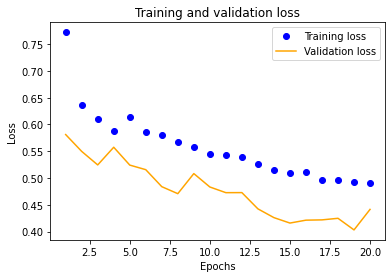

In [72]:
history_dict = history.history
# Learning curve(Loss)
# let's see the training and validation loss by epoch

# loss
loss_values = history_dict['loss'] # you can change this
val_loss_values = history_dict['val_loss'] # you can also change this

# range of X (no. of epochs)
epochs = range(1, len(loss_values) + 1) 

# plot
plt.plot(epochs, loss_values, 'bo', label='Training loss')
plt.plot(epochs, val_loss_values, 'orange', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

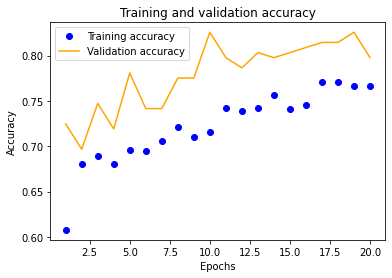

0.8258426785469055

In [73]:
# Learning curve(accuracy)
# let's see the training and validation accuracy by epoch

# accuracy
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

# range of X (no. of epochs)
epochs = range(1, len(acc) + 1)

# plot
# "bo" is for "blue dot"
plt.plot(epochs, acc, 'bo', label='Training accuracy')
# orange is for "orange"
plt.plot(epochs, val_acc, 'orange', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# this is the max value - should correspond to
# the HIGHEST train accuracy
np.max(val_acc)

# References : 
1. https://medium.com/luca-chuangs-bapm-notes/build-a-neural-network-in-python-binary-classification-49596d7dcabf
2. https://www.kaggle.com/c/titanic/overview
3. https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
4. https://www.annytab.com/neural-network-classification-in-python/#:~:text=%20Neural%20Network%20Classification%20in%20Python%20%201,before%20by%20splitting%20it%20into%20a...%20More%20
5. https://www.techwithtim.net/tutorials/python-neural-networks/text-classification-p1/
6. https://www.techwithtim.net/tutorials/python-neural-networks/text-classification-p2/
7. https://www.techwithtim.net/tutorials/python-neural-networks/text-classification-p3/
8. https://www.techwithtim.net/tutorials/python-neural-networks/text-classification-p4/
9. https://www.tutorialspoint.com/keras/keras_convolution_neural_network.htm
10. https://www.kaggle.com/code/eliotbarr/text-classification-using-neural-networks/notebook
11. https://www.kaggle.com/code/eliotbarr/text-classification-using-neural-networks/notebook
12. https://thinkingneuron.com/how-to-use-artificial-neural-networks-for-classification-in-python/
13. https://www.annytab.com/neural-network-classification-in-python/#:~:text=%20Neural%20Network%20Classification%20in%20Python%20%201,before%20by%20splitting%20it%20into%20a...%20More%20
14. https://realpython.com/python-keras-text-classification/
15. https://keras.io/guides/sequential_model/
16. https://keras.io/api/models/sequential/
17. https://analyticsindiamag.com/a-complete-understanding-of-dense-layers-in-neural-networks/




